In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../dataset/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df1 = df.select_dtypes('object')
df1.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])

In [9]:
df['Sex'][:4]

0    1
1    0
2    1
3    0
Name: Sex, dtype: int64

In [10]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [13]:
df['ChestPainType'] = lb.fit_transform(df['ChestPainType'])
df['ExerciseAngina'] = lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = lb.fit_transform(df['ST_Slope'])

In [14]:
order  = OrdinalEncoder()

In [15]:
df['RestingECG'] = order.fit_transform(df[['RestingECG']])

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1.0,172,0,0.0,2,0
1,49,0,2,160,180,0,1.0,156,0,1.0,1,1
2,37,1,1,130,283,0,2.0,98,0,0.0,2,0
3,48,0,0,138,214,0,1.0,108,1,1.5,1,1
4,54,1,2,150,195,0,1.0,122,0,0.0,2,0


In [17]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

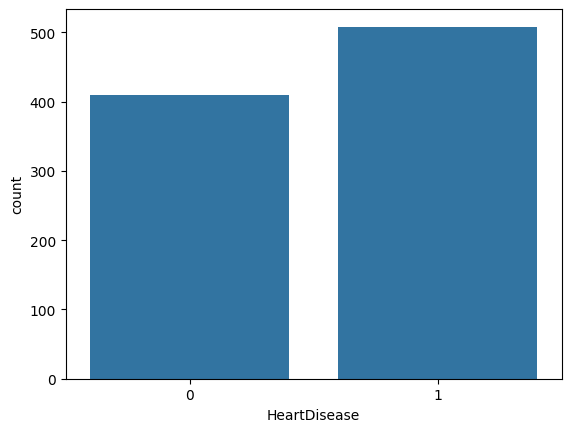

In [18]:
sns.countplot(x=df['HeartDisease'])

#### Building Model for KNN

In [19]:
x = df.drop('HeartDisease',axis=1)
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1.0,172,0,0.0,2
1,49,0,2,160,180,0,1.0,156,0,1.0,1
2,37,1,1,130,283,0,2.0,98,0,0.0,2
3,48,0,0,138,214,0,1.0,108,1,1.5,1
4,54,1,2,150,195,0,1.0,122,0,0.0,2


In [20]:
y = df['HeartDisease']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.65, random_state=65)

<Axes: >

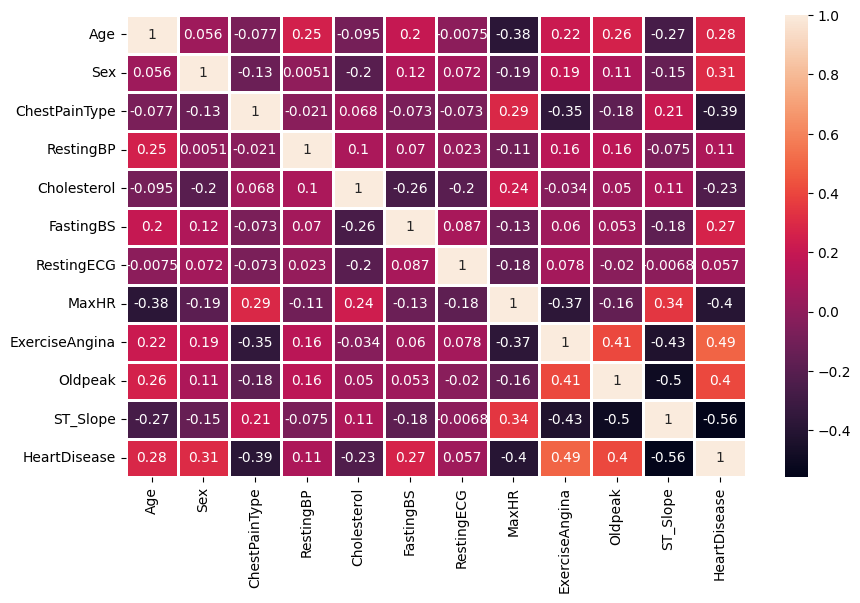

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidths=2)

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
y_pred = knn.predict(x_test)

In [31]:
print(y_test.shape)
print(y_pred.shape)


(322,)
(322,)


In [33]:
clf = classification_report(y_test, y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       145
           1       0.73      0.69      0.71       177

    accuracy                           0.69       322
   macro avg       0.68      0.69      0.68       322
weighted avg       0.69      0.69      0.69       322



In [35]:
#perform cross validation with 5 folds
cv_scores = cross_val_score(knn,x, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores)}")

Cross-Validation Scores: [0.63586957 0.76630435 0.6576087  0.6284153  0.6284153 ]
Average CV Score: 0.6633226419577097


In [36]:
#list to store cross validation results
k_values = list(range(1,30, 2))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x,y, cv=5)
    cv_scores.append(np.mean(scores))


Best k values: 15
Best Cross-Validation Accuracy: 0.6938702779757662


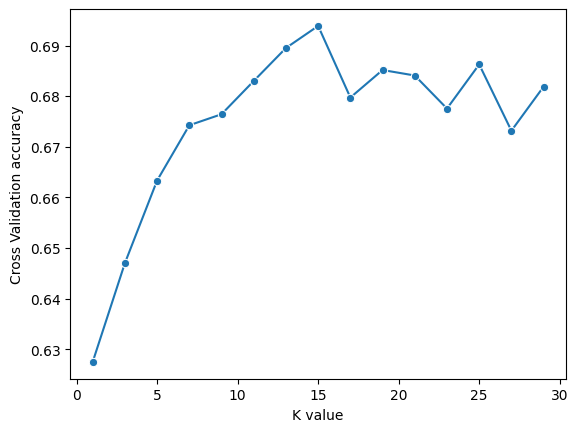

In [54]:
sns.lineplot(x=k_values,y=cv_scores, marker='o')
plt.xlabel('K value')
plt.ylabel('Cross Validation accuracy')

# Find the best k value
best_k = k_values[np.argmax(cv_scores)]

print(f'Best k values: {best_k}')
print(f"Best Cross-Validation Accuracy: {max(cv_scores)}")